## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [10]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [11]:
len(train_data)

8982

In [12]:
len(test_data)

2246

In [13]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [14]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [15]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [16]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [18]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [19]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [22]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [23]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 63ms/step - loss: 2.6306 - accuracy: 0.4959 - val_loss: 1.7318 - val_accuracy: 0.6370
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4356 - accuracy: 0.7040 - val_loss: 1.3002 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0429 - accuracy: 0.7761 - val_loss: 1.1055 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8066 - accuracy: 0.8282 - val_loss: 1.0073 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6364 - accuracy: 0.8624 - val_loss: 0.9385 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5072 - accuracy: 0.8938 - val_loss: 0.9053 - val_accuracy: 0.8220
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4094 - accuracy: 0.9143 - val_loss: 0.8926 - val_accuracy: 0.8150
Epoch 8/20
16

**Plotting the training and validation loss**

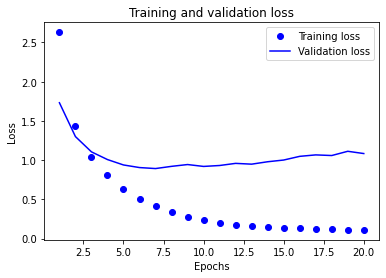

In [26]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

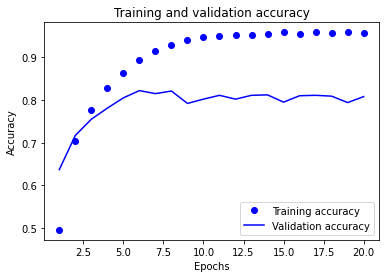

In [27]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [28]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 3s 93ms/step - loss: 2.4875 - accuracy: 0.5455
Epoch 2/9
18/18 [==============================] - 2s 98ms/step - loss: 1.3420 - accuracy: 0.7190
Epoch 3/9
18/18 [==============================] - 3s 143ms/step - loss: 1.0132 - accuracy: 0.7876
Epoch 4/9
18/18 [==============================] - 2s 87ms/step - loss: 0.7995 - accuracy: 0.8308
Epoch 5/9
18/18 [==============================] - 2s 88ms/step - loss: 0.6347 - accuracy: 0.8693
Epoch 6/9
18/18 [==============================] - 1s 53ms/step - loss: 0.5079 - accuracy: 0.8949
Epoch 7/9
18/18 [==============================] - 1s 46ms/step - loss: 0.4117 - accuracy: 0.9152
Epoch 8/9
18/18 [==============================] - 1s 44ms/step - loss: 0.3367 - accuracy: 0.9279
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9492 - accuracy: 0.7983


In [29]:
results

[0.9491541981697083, 0.7983080744743347]

In [30]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.17542297417631345

### Generating predictions on new data

In [31]:
predictions = model.predict(x_test)

In [32]:
predictions[0].shape

(46,)

In [33]:
np.sum(predictions[0])

0.99999994

In [34]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [35]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [36]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [37]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 2.7422 - accuracy: 0.3514 - val_loss: 1.9223 - val_accuracy: 0.5900
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 1.5816 - accuracy: 0.6198 - val_loss: 1.5238 - val_accuracy: 0.6370
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 1.2648 - accuracy: 0.6819 - val_loss: 1.3730 - val_accuracy: 0.6760
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 1.0846 - accuracy: 0.7342 - val_loss: 1.3138 - val_accuracy: 0.7010
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 0.9618 - accuracy: 0.7487 - val_loss: 1.2858 - val_accuracy: 0.7110
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 0.8729 - accuracy: 0.7621 - val_loss: 1.2795 - val_accuracy: 0.7150
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.7965 - accuracy: 0.7788 - val_loss: 1.3104 - val_accuracy: 0.7150
Epoch 8/20
63